# Model Deployment

## Intro

- data scientist bertugas untuk menyampaikan hasil penemuannya kepada orang lain
- kita dapat mengirimkannya dengan model yang telah dilatih, sehingga seseorang dapat mengevaluasi dan menggunakannya
- jika seseorang mengetahui teknis maka dapat dikirimkan via email dengan beberapa jupyter notebook
- Apabila seseorang tidak mengetahui teknis maka dapat digunkan dengan cara berikut:
    - Membuat model sederhana yang dapat di-deploy ke web, di mana pengguna dapat memasukkan variabel untuk mendapatkan prediksi.
    - Membangun komponen yang dibutuhkan oleh microframework Flask untuk membuat aplikasi web.
    - Menyebarkan aplikasi web terakhir menggunakan platform Heroku.

# Creating Model for Deployment

- Dataset terdiri dari siswa yang ditempatkan:
     -  data penempatan siswa di kampus XYZ
     -  Mencakup secondary dan higher secondary school percentage dan 
     -  specialization. 
     -  degree specialization, 
     -  type
     -  Work experience 
     -  tawaran salary 

## importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import pickle

%matplotlib inline

In [2]:
data = pd.read_csv('Placement_Data_Full_Class.csv')

#Remove Serial Number
data.drop("sl_no", axis=1, inplace=True)

In [3]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
print ("The shape of the  data is (row, column):"+ str(data.shape))
print (data.info())

The shape of the  data is (row, column):(215, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB
None


- data kualifikasi Gender dan Pendidikan
- data kinerja pendidikan (skor)
- status penempatan dan detail gaji
- dapat mengharapkan nilai nol dalam gaji karena kandidat yang tidak ditempatkan tidak akan memiliki gaji
- Status penempatan adalah variabel target kami, sisanya adalah variabel independen kecuali gaji

In [5]:
report = data.profile_report(title='Campus Placement Data - Report',
                             progress_bar=False)
report

# Uncomment syntax below to make new html file

# report.to_file(output_file='output.html')

- 67 Nilai yang hilang dalam Gaji untuk siswa yang tidak ditempatkan. Nilai NaN perlu diisi.
- Data tidak diskalakan. 
- Kolom gaji berkisar antara 200k-940k, kolom numerik lainnya adalah persentase.
- 300k pada Persentil ke-75 berjalan hingga maks 940k, dalam Gaji (skewnwss tinggi). Dengan demikian, outlier pada akhir gaji tinggi.

## Data Cleaning/Handling missing values

In [6]:
data['salary'].fillna(value=0, inplace=True)
print('Salary column with null values:',
      data['salary'].isnull().sum(), sep = '\n')

Salary column with null values:
0


## Exploring Data by each Features 

In [7]:
"""
Feature: Gender

Does gender affect placements?
"""

data.gender.value_counts()

M    139
F     76
Name: gender, dtype: int64

/home/jefl5/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


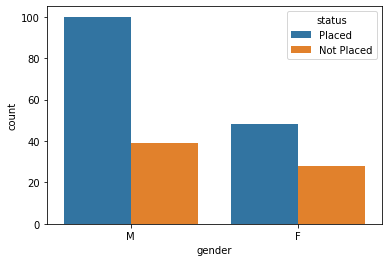

In [8]:
sns.countplot("gender", hue="status", data=data)
plt.show()

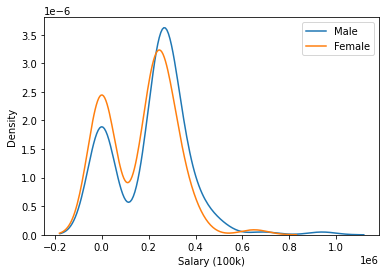

In [9]:
sns.kdeplot(data.salary[data.gender=="M"])
sns.kdeplot(data.salary[data.gender=="F"])
plt.legend(["Male", "Female"])
plt.xlabel("Salary (100k)")
plt.show()

/home/jefl5/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


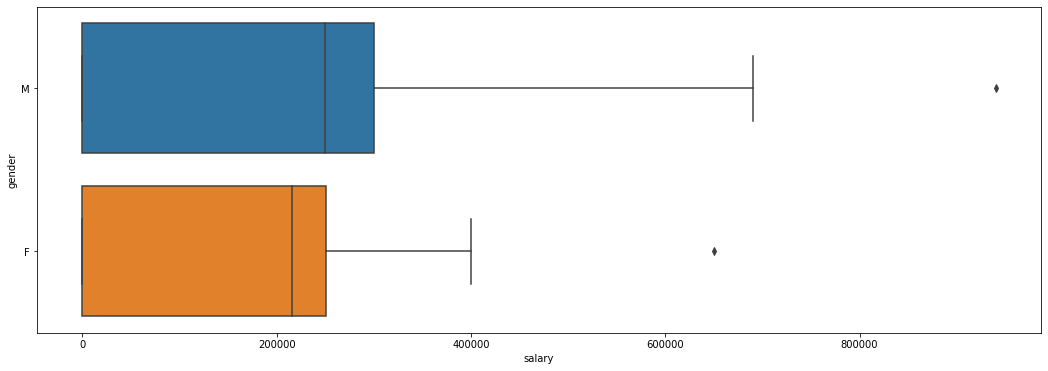

In [10]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "gender", data=data)
plt.show()

- sampel 139 siswa laki-laki dan 76 siswa perempuan.
- 30 Siswa perempuan dan 40 siswa laki-laki tidak ditempatkan. Siswa laki-laki memiliki penempatan yang relatif lebih tinggi.
- Siswa laki-laki ditawari gaji yang sedikit lebih besar daripada rata-rata perempuan.

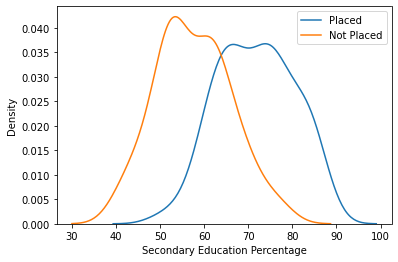

In [11]:
"""
Feature: ssc_p (Secondary Education percentage), ssc_b (Board Of Education)

Does Secondary Education affect placements?
"""
sns.kdeplot(data.ssc_p[data.status=="Placed"])
sns.kdeplot(data.ssc_p[data.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Secondary Education Percentage")
plt.show()

- Semua siswa dengan Persentase Pendidikan Menengah di atas 90% ditempatkan
- Semua siswa dengan Persentase Pendidikan Menengah di bawah 50% tidak ditempatkan
- Siswa dengan Persentase Pendidikan Menengah yang baik ditempatkan rata-rata.

/home/jefl5/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


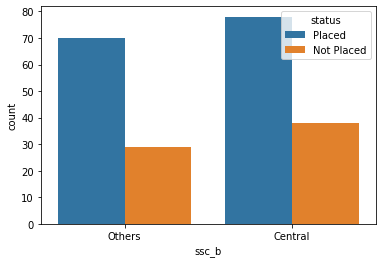

In [12]:
sns.countplot("ssc_b", hue="status", data=data)
plt.show()

- Board Of Education tidak banyak mempengaruhi Placement Status.

/home/jefl5/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


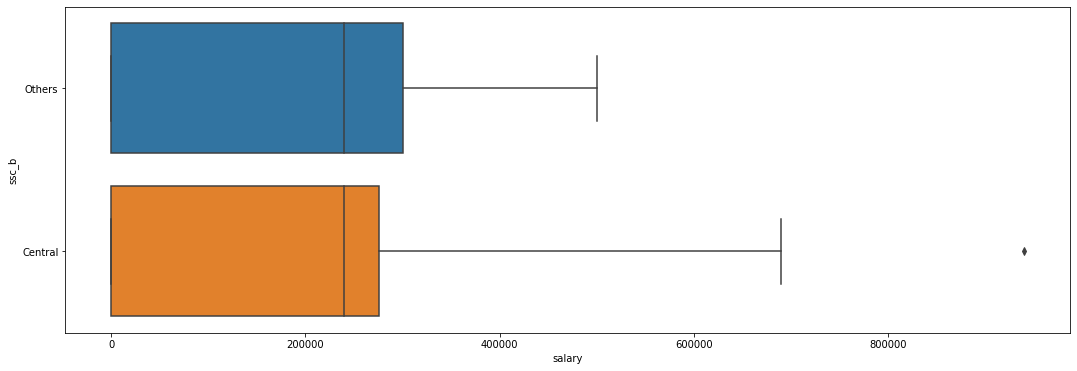

In [13]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "ssc_b", data=data)
plt.show()

- Outliers terdapat pada keduanya, tetapi siswa dari Central Board mendapatkan pekerjaan bergaji tinggi.

/home/jefl5/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


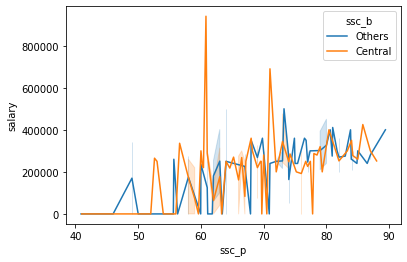

In [14]:
sns.lineplot("ssc_p", "salary", hue="ssc_b", data=data)
plt.show()

- Tidak ada pola khusus (correlation) antara Secondary Education Percentage dan Salary. Board of Education Tidak Mempengaruhi Gaji

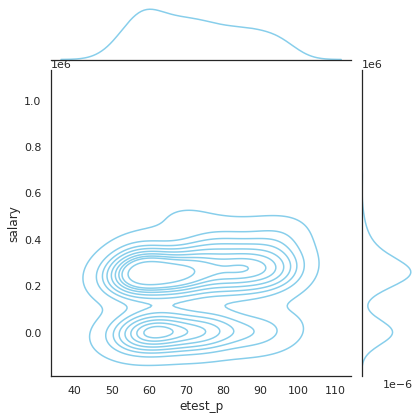

In [15]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set(style="white", color_codes=True)
sns.jointplot(x=data["etest_p"], y=data["salary"], kind='kde', color="skyblue")

plt.show()

- Sebagian besar kandidat yang mendapat skor sekitar 60 persen mendapat paket yang layak sekitar 3 lakh PA
- Tidak banyak kandidat yang menerima gaji lebih dari 4 lakh PA
- Bagian padat bawah menunjukkan kandidat yang tidak ditempatkan

/home/jefl5/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jefl5/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jefl5/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

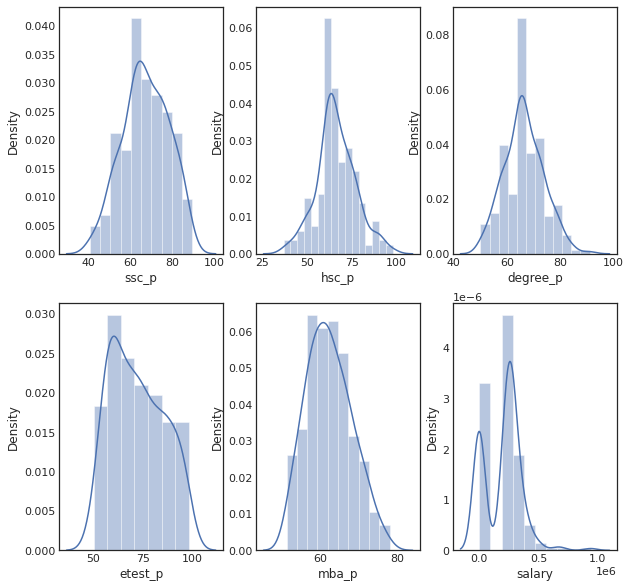

In [16]:
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
plt.subplot(231)
sns.distplot(data['ssc_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(232)
sns.distplot(data['hsc_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(233)
sns.distplot(data['degree_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(234)
sns.distplot(data['etest_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(235)
sns.distplot(data['mba_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(236)
sns.distplot(data['salary'])
fig = plt.gcf()
fig.set_size_inches(10,10)

- Semua distribusi mengikuti distribusi normal kecuali fitur gaji
- Sebagian besar kinerja pendidikan kandidat adalah antara 60-80%
- Distribusi gaji mendapat outlier dimana hanya sedikit yang mendapat gaji 7,5L dan 10L PA

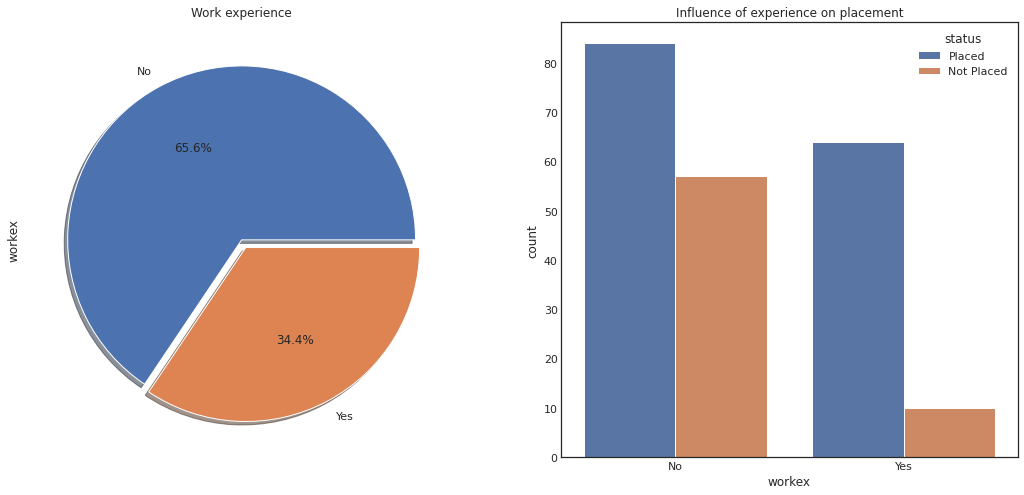

In [17]:
plt.style.use('seaborn-white')
f,ax=plt.subplots(1,2,figsize=(18,8))
data['workex'].value_counts().plot.pie(explode=[0,0.05], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Work experience')
sns.countplot(x = 'workex',hue = "status",data = data)
ax[1].set_title('Influence of experience on placement')

plt.show()

- hampir 66,2% kandidat yang tidak pernah memiliki pengalaman kerja
- Kandidat yang tidak pernah memiliki pengalaman kerja lebih banyak dipekerjakan daripada yang memiliki pengalaman
- Kita dapat menyimpulkan bahwa pengalaman kerja tidak mempengaruhi seorang kandidat dalam proses rekrutmen

## Preprocessing data for classification models

In [18]:
from sklearn.preprocessing import LabelEncoder
object_cols = ['gender', 'workex', 'specialisation', 'status']

label_enconder = LabelEncoder()
for col in object_cols:
    data[col]=label_enconder.fit_transform(data[col])

data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0
3,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,0.0
4,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0


In [19]:
# Library imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [20]:
# Seperating Features and Target
X = data[['ssc_p', 'hsc_p', 'degree_p', 'etest_p']]
y = data['status']

In [21]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [22]:
# Decision Tree
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8
              precision    recall  f1-score   support

           0       0.71      0.60      0.65        20
           1       0.83      0.89      0.86        45

    accuracy                           0.80        65
   macro avg       0.77      0.74      0.75        65
weighted avg       0.79      0.80      0.80        65



In [23]:
#Using Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8615384615384616
              precision    recall  f1-score   support

           0       0.79      0.75      0.77        20
           1       0.89      0.91      0.90        45

    accuracy                           0.86        65
   macro avg       0.84      0.83      0.84        65
weighted avg       0.86      0.86      0.86        65



In [24]:
#Using Logistic Regression

LogR = LogisticRegression(solver='lbfgs')
LogR.fit(X_train, y_train)

y_pred = LogR.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8461538461538461
              precision    recall  f1-score   support

           0       0.78      0.70      0.74        20
           1       0.87      0.91      0.89        45

    accuracy                           0.85        65
   macro avg       0.83      0.81      0.81        65
weighted avg       0.84      0.85      0.84        65



## Pickle

- digunakan untuk serializing dan de-serializing struktur objek Python. 
- Objek apa pun dengan Python dapat dibuat pickled sehingga dapat disimpan di disk. 
- pickle melakukan 'serializes' objek terlebih dahulu sebelum menulisnya ke file. 
- Pickling adalah cara untuk mengubah objek python (list, dict, etc.) Menjadi character stream. 
- dengan pickle idenya adalah bahwa character stream ini berisi semua informasi yang diperlukan untuk merekonstruksi objek dalam skrip python lain.

## HTML

- adalah standard markup language untuk membuat halaman web
- HTML singkatan dari Hyper Text Markup Language
- HTML adalah bahasa markup standar untuk membuat halaman Web
- HTML menggambarkan struktur halaman Web
- HTML terdiri dari serangkaian elemen
- Elemen HTML memberi tahu browser cara menampilkan konten
- Elemen HTML memberi label potongan konten seperti "ini adalah judul", "ini adalah paragraf", "ini adalah tautan", dll.

### A simple HTML Document

<!DOCTYPE html>
<html>
<head>
  <title>Page Title</title>
</head>
<body>

  <h1>My First Heading</h1>
  <p>My first paragraph.</p>

</body>
</html>

- !DOCTYPE html mendefinisikan bahwa dokumen ini adalah dokumen HTML5
- html elemen adalah elemen - root dari halaman HTML
- head elemen berisi informasi meta tentang halaman HTML
- title elemen menentukan judul untuk halaman HTML (yang ditampilkan di judul browser atau di tab halaman)
- body elemen mendefinisikan badan dokumen, dan merupakan wadah untuk semua konten yang terlihat, seperti headings, paragraphs, images, hyperlinks, tables, lists, dll.
- h1 elemen mendefinisikan headingbesar
- p element yang mendefinisikan sebuah paragraph
- Elemen HTML adalah apapun yang dimulai dari tag awal hingga tag akhir